# Problem Statement

### Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

In [231]:
# import all the labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

In [232]:
# dataframe as df
train = pd.read_csv('train_sentiment.csv')
test1 = pd.read_csv('test_sentiment.csv')
print(train.head)
print('\n\n')
print(test1.head)

<bound method NDFrame.head of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
5        6      1  iPhone software update fucked up my phone big ...
6        7      0  Happy for us .. #instapic #instadaily #us #son...
7        8      0  New Type C charger cable #UK http://www.ebay.c...
8        9      0  Bout to go shopping again listening to music #...
9       10      0  Photo: #fun #selfie #pool #water #sony #camera...
10      11      1  hey #apple when you make a new ipod dont make ...
11      12      1  Ha! Not heavy machinery but it does what I nee...
12      13      1  Contemplating giving in to the iPhone bandwago...
13  

In [233]:
print(train.shape,test1.shape)

(7920, 3) (1953, 2)


In [234]:
# length of the tweet 
train['length'] = train['tweet'].apply(len)
test1['length'] = test1['tweet'].apply(len)

In [330]:
# combing test and train data in one data frame for combine text preprocessing and reducing time to deal with data
combi = train.append(test1, ignore_index=True)

C:\Users\reque\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [236]:
combi.head()

,id,label,length,tweet
0,1,0.0,128,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,131,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,123,We love this! Would you go? #talk #makememorie...
3,4,0.0,112,I'm wired I know I'm George I was made that wa...
4,5,1.0,124,What amazing service! Apple won't even talk to...


In [237]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
corpus = []
for  i in range(len(combi['tweet'])):
    review = ''.join([char for char in combi['tweet'][i] if char not in string.punctuation])
    review = review.lower()
    review = review.split()
    review = ' '.join([wordnet.lemmatize(word) for word in review if word not in stopwords.words('english')])
    corpus.append(review)

## Exploratory Data Analysis

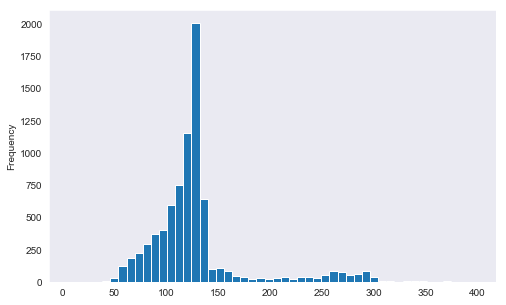

In [238]:
plt.figure(figsize=(8,5))
train['length'].plot(kind='hist',bins=50)

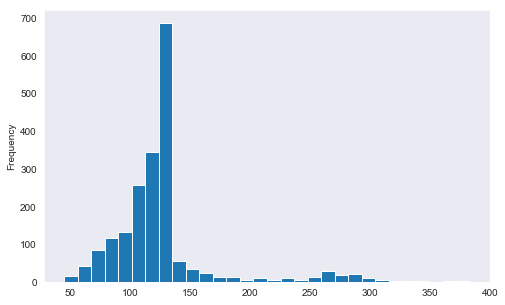

In [239]:
plt.figure(figsize=(8,5))
test1['length'].plot(kind='hist',bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002379CDF4668>,
      dtype=object)

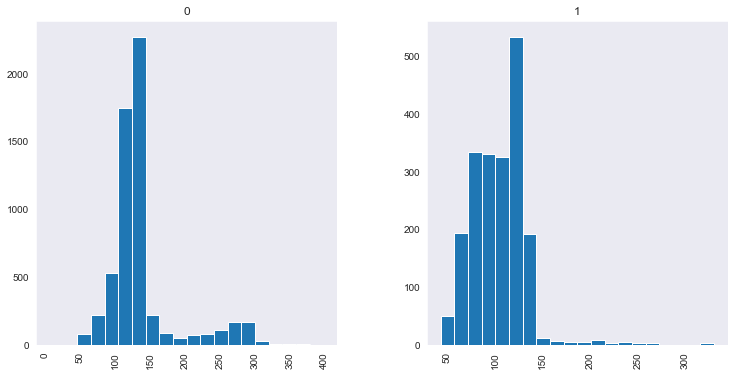

In [240]:
train.hist(column='length',by='label',bins=20,figsize=(12,6))

## Understanding common words used in tweets: wordcloud

In [241]:
# all words from tweets 
all_words = ' '.join([word for word in combi['tweet']])

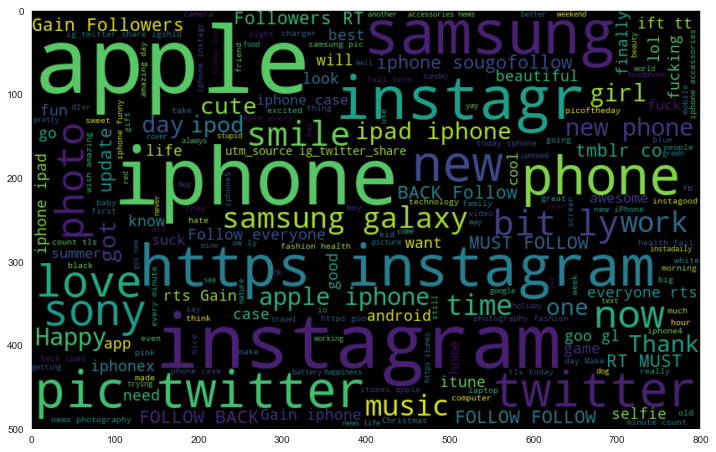

In [242]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')

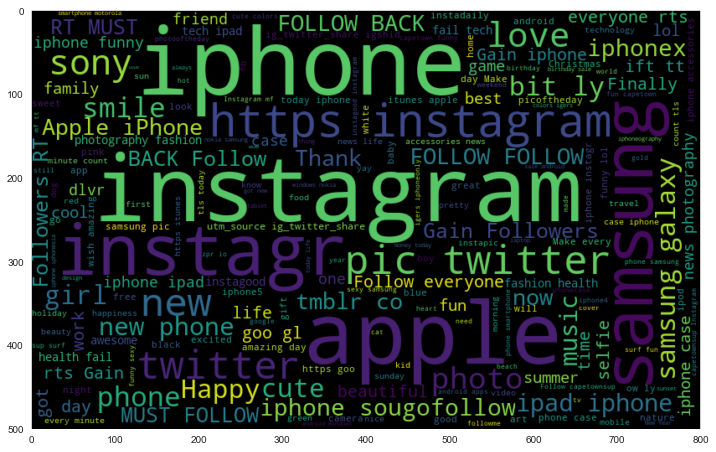

In [243]:
# normal word cloud from tweets
normal_words = ' '.join([word for word in combi['tweet'][combi['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(normal_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')

### top normal words 

<Figure size 864x576 with 0 Axes>

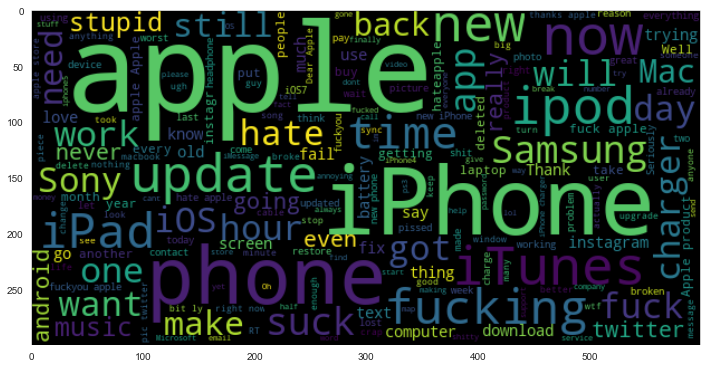

In [269]:
# negative word cloud from tweets
plt.figure(figsize=(12,8))
negative_words = ' '.join([word for word in combi.tweet[combi.label==1]])
wordcloud = WordCloud(width=600,height=300,random_state=42,max_font_size=110).generate(negative_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')

## understanding of  hastags impact

In [287]:
# function to collect hastags
def hastag_impact(x):
    hastags = []
    #looping overs the words
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hastags.append(ht)
    return hastags

In [310]:
# normal hastag in tweets
normal_hastag = hastag_impact(combi['tweet'][combi['label']==0])

In [311]:
# racist hastag in tweets
racist_hastag = hastag_impact(combi['tweet'][combi['label']==1])

In [312]:
#unnesting list
normal_hastag = sum(normal_hastag,[])
racist_hastag = sum(racist_hastag,[])

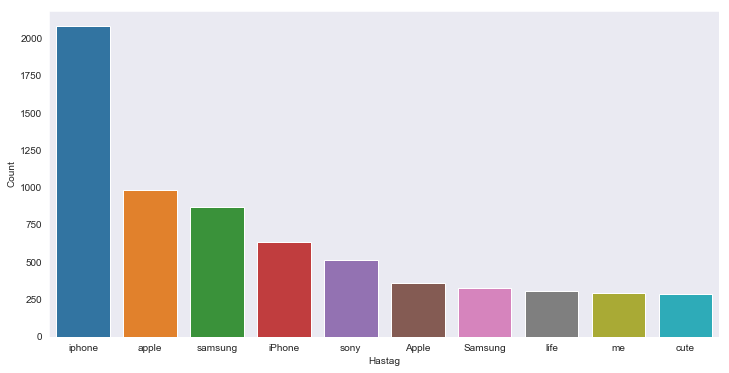

In [326]:
# selecting top 10 noraml hastags
a = nltk.FreqDist(normal_hastag)
df = pd.DataFrame({
    'Hastag':list(a.keys()),
    'Count':list(a.values())
})
# selecting top 10 hastags
df = df.nlargest(columns='Count',n=10)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df,x='Hastag',y='Count')

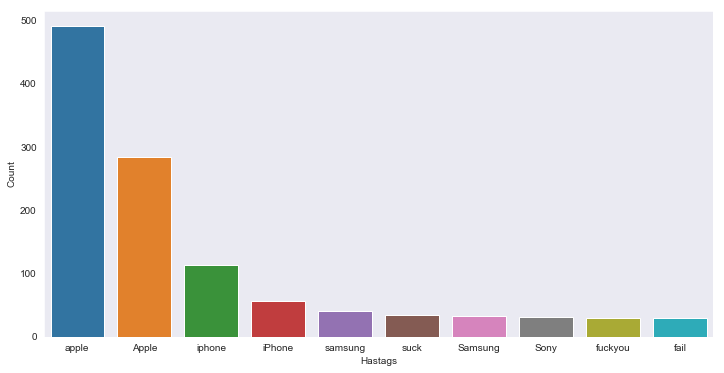

In [329]:
# selecting top 10 racist hastagss
b = nltk.FreqDist(racist_hastag)
df1 = pd.DataFrame({
    'Hastags':list(b.keys()),
    'Count':list(b.values())
})

df1 = df1.nlargest(columns='Count',n=10)
plt.figure(figsize=(12,6))
ax1 = sns.barplot(data=df1,x='Hastags',y='Count')

## converting corpus to matrix form

In [263]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [249]:
cv = CountVectorizer(min_df=3, max_features=None, 
                     strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                     ngram_range=(1, 4),stop_words = 'english').fit(train['tweet'])

In [250]:
data = cv.fit_transform(corpus)

In [251]:
X = data[:7920,:]
test = data[7920:,:]

print(test.shape,X.shape)

(1953, 11110) (7920, 11110)


## train_test_split for training and  model training

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, train['label'],test_size=0.2,random_state=42)

In [253]:
from sklearn.linear_model import LogisticRegression
spam_detection_model = LogisticRegression(C=1000,random_state=2019).fit(X_train,y_train)

C:\Users\reque\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [254]:
pred = spam_detection_model.predict(X_test)

In [255]:
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Model evaluation

In [256]:
from sklearn.metrics import confusion_matrix, classification_report

In [257]:
print('Confusion Matrix : \n',confusion_matrix(y_test,pred))
print('Classification report : \n', classification_report(y_test,pred))

Confusion Matrix : 
 [[1048  104]
 [ 138  294]]
Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      1152
           1       0.74      0.68      0.71       432

   micro avg       0.85      0.85      0.85      1584
   macro avg       0.81      0.80      0.80      1584
weighted avg       0.84      0.85      0.85      1584



## prediction on brand new data

In [258]:
test_prediction = spam_detection_model.predict(test)

In [259]:
test_prediction[:1584,]

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [260]:
print(classification_report(y_test,test_prediction[:1584,]))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1152
           1       0.27      0.23      0.25       432

   micro avg       0.62      0.62      0.62      1584
   macro avg       0.50      0.50      0.50      1584
weighted avg       0.60      0.62      0.61      1584



In [261]:
pred = pd.DataFrame(test_prediction,index=test1['id'],columns=['label']).to_csv('prediction.csv')